# Task 3

Решим задачу многоклассовой классификации на классическом наборе данных ирисов Фишера.

https://www.kaggle.com/datasets/uciml/iris

**Описание датасета:**

- Id - id ириса
- SepalLengthCm - длина чашелистика в см
- SepalWidthCm - ширина чашелистика в см
- PetalLengthCm - длина лепестка в см
- PetalWidthCm - ширина лепестка в см
- Species - вид ириса

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

%precision %.4f

import warnings
warnings.filterwarnings('ignore')

# 1. Iris EDA

In [3]:
df = pd.read_csv('Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


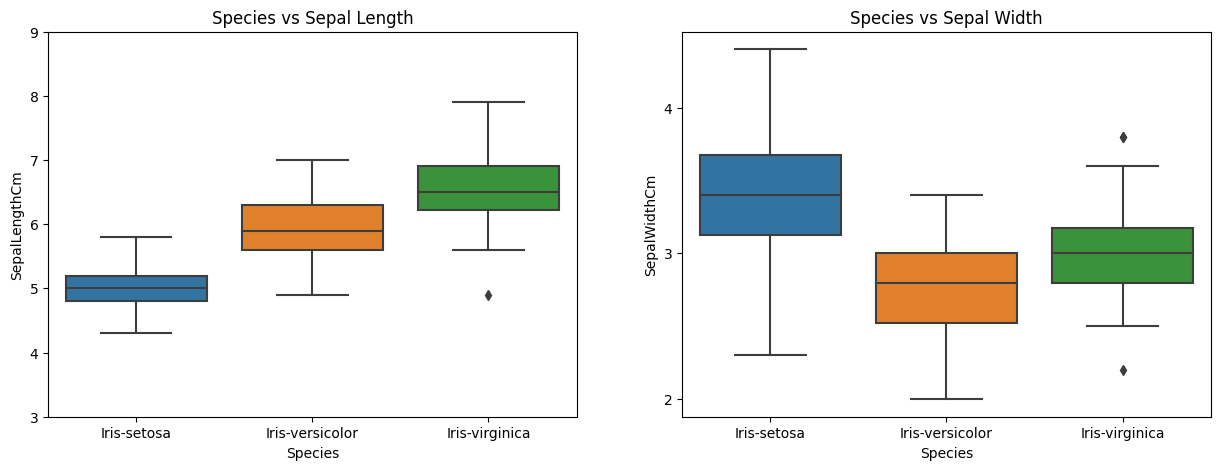

In [7]:
_, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x = "Species", y = "SepalLengthCm", data=df, ax=ax[0])
ax[0].set_title('Species vs Sepal Length')
ax[0].set_yticks(range(3, 10, 1))
sns.boxplot(x = "Species", y  = "SepalWidthCm", data=df, ax=ax[1])
ax[1].set_title('Species vs Sepal Width')
ax[1].set_yticks(range(2, 5, 1))
plt.show()

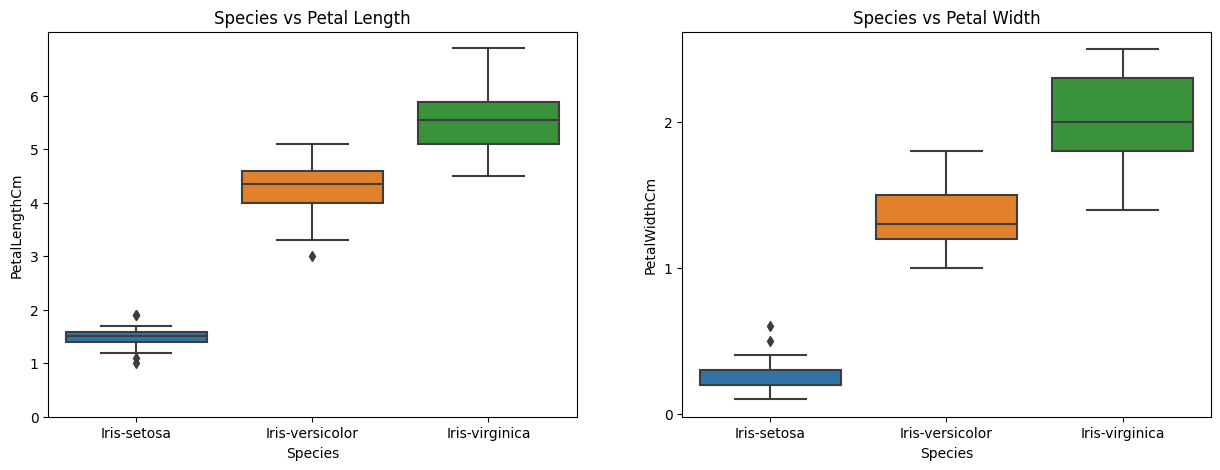

In [8]:
_, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x = "Species", y = "PetalLengthCm", data=df, ax=ax[0])
ax[0].set_title('Species vs Petal Length')
ax[0].set_yticks(range(0, 7, 1))
sns.boxplot(x = "Species", y  = "PetalWidthCm", data=df, ax=ax[1])
ax[1].set_title('Species vs Petal Width')
ax[1].set_yticks(range(0, 3, 1))
plt.show()

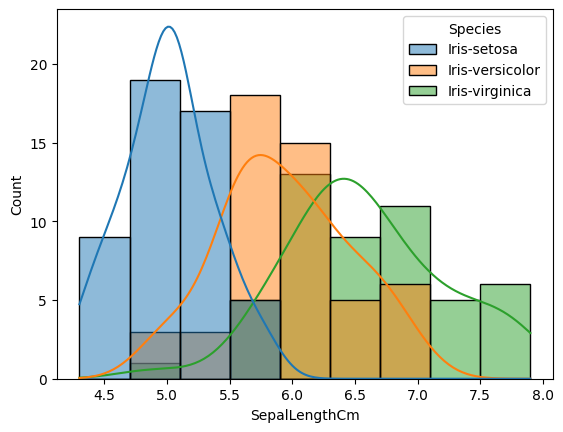

In [9]:
sns.histplot(data = df, x = "SepalLengthCm", hue = "Species", kde = True);

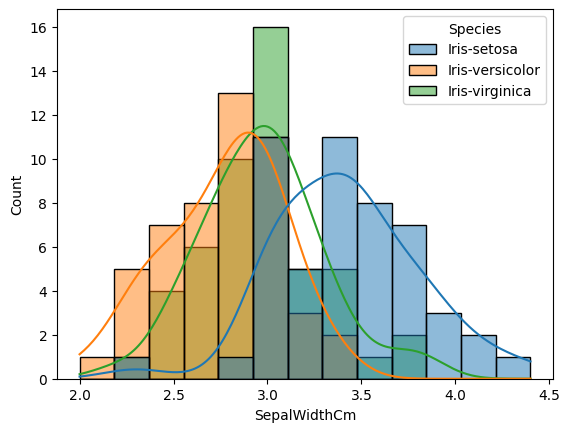

In [10]:
sns.histplot(data = df, x = "SepalWidthCm", hue = "Species", kde = True);

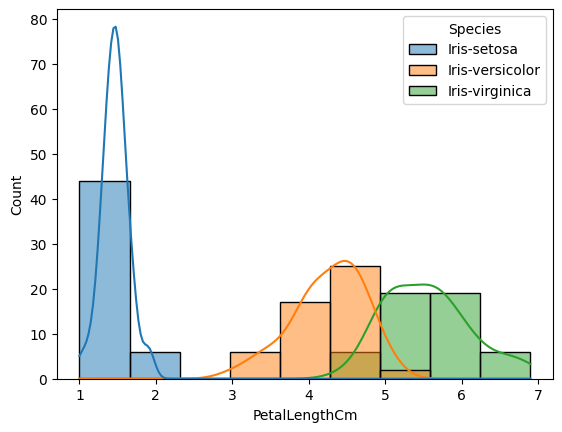

In [11]:
sns.histplot(data = df, x = "PetalLengthCm", hue = "Species", kde = True);

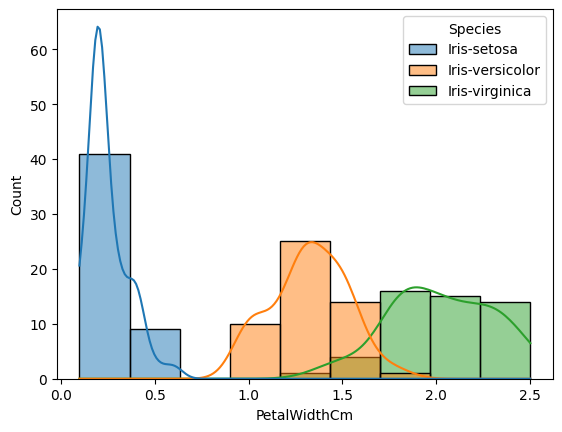

In [12]:
sns.histplot(data = df, x = "PetalWidthCm", hue = "Species", kde = True);

- Вид setosa имеет наименьшие показатели по всем измерениям, кроме ширины чашелистика, у данного сорта она самая большая
- Вид virginica имеет самые длинные чашелистики и лепестки, ширина лепестка также максимальная среди трёх видов, но ширина чашелистика уступает сорту setosa
- Вид versicolor имеет, в основном, средние показатели

Удалим признак Id, который не несет никакой информации

In [13]:
df.drop(["Id"], axis = 1, inplace = True)

In [14]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


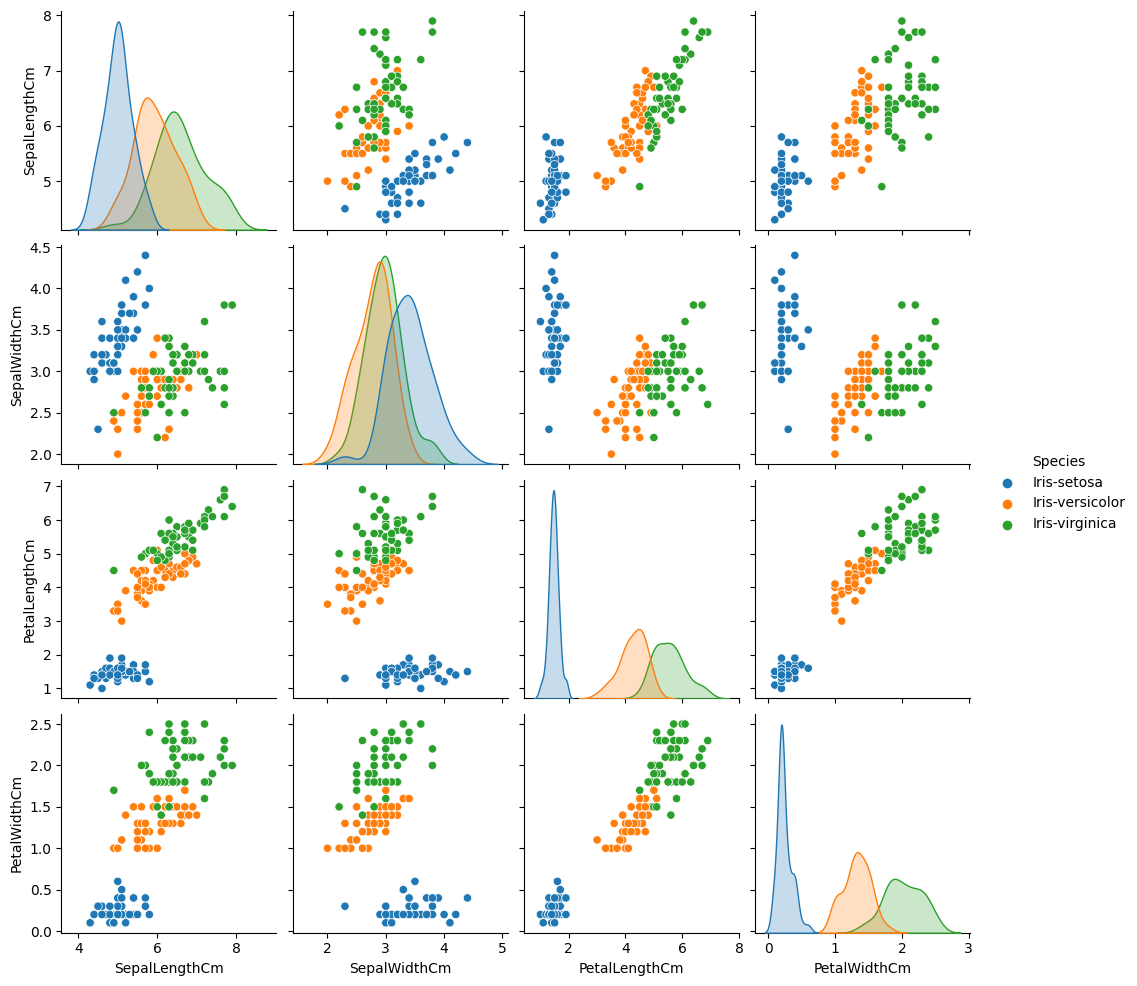

In [15]:
sns.pairplot(hue = 'Species', data = df);

- Видно, что вид setosa линейно разделим с двумя другими
- Зависимость длины от ширины лепестка имеет линейный характер для всех классов
- С помощью графика длины от ширины лепестка можно линейно отделить все классы друг от друга
- Зависимость длины/ширины чашелистика от длин/ширины лепестка наиболее четко отделяет вид setosa от остальных
- На графике длины от ширины чашелистика сорта versicolor и virginica линейно неразделимы 

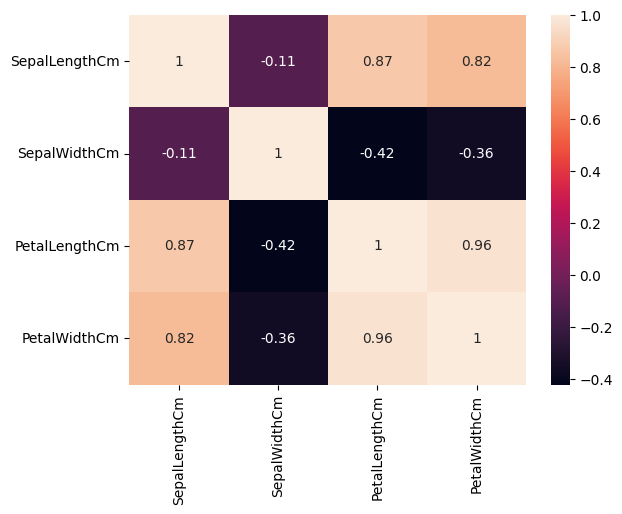

In [16]:
sns.heatmap(df.corr(), annot=True);

In [17]:
df['Species_num'] = 0
df.loc[df['Species'] == 'Iris-setosa', 'Species_num'] = 0
df.loc[df['Species'] == 'Iris-versicolor', 'Species_num'] = 1
df.loc[df['Species'] == 'Iris-virginica', 'Species_num'] = 2
df = df.drop(columns=['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_num
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# 2. Разбиение данных и масштабирование

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = df['Species_num']
X = df.drop(columns=['Species_num'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

# 3. Построение моделей

In [20]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier, OutputCodeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize
from time import process_time

models = {'Log reg': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'SVM': SVC(probability = True),
          'Naive Bayes': GaussianNB(),
          'Decision Tree': DecisionTreeClassifier()}
models_params = {'Log reg': {'estimator__C': np.linspace(0.1**3, 3, 30)},
                 'KNN': {'estimator__n_neighbors': range (3, 8), 'estimator__weights': ['uniform', 'distance'], 'estimator__p':[1, 2]},
                 'SVM': {'estimator__C': np.linspace(0.1**3, 3, 30), 'estimator__kernel':['linear', 'poly', 'rbf','sigmoid'], "estimator__degree":range(1, 6), 'estimator__gamma':['scale', 'auto']},
                 'Naive Bayes': {'estimator__var_smoothing': np.logspace(0,-9, num=100)},
                 'Decision Tree': {"estimator__criterion": ['gini', 'entropy', 'log_loss'], "estimator__splitter": ['best', 'random'], 'estimator__class_weight':[None, 'balanced']}
                 }
OneVsRest = {'roc_auc': [], 'time': [], 'model': []}
OneVsOne = {'roc_auc': [], 'time': [], 'model': []}
OutCodeClass = {'roc_auc': [], 'time': [], 'model': []}

for name in models.keys():
    
    print(name)
    
    start_time = process_time()
    OVR = GridSearchCV(OneVsRestClassifier(estimator = models[name], n_jobs = -1), 
    param_grid = models_params[name], scoring ='roc_auc', refit = True, cv = 5)
    OVR.fit(X_train_scaled, y_train)
    stop_time = process_time()
    prediction = OVR.predict_proba(X_test_scaled)
    OneVsRest['roc_auc'].append(roc_auc_score(y_test, prediction, multi_class = 'ovr'))
    OneVsRest['time'].append(stop_time-start_time)
    OneVsRest['model'].append(name)
    
    start_time = process_time()
    OVO = GridSearchCV(OneVsOneClassifier(estimator = models[name], n_jobs = -1), 
    param_grid = models_params[name], scoring ='roc_auc', refit = True, cv = 5)
    OVO.fit(X_train_scaled, y_train)
    stop_time = process_time()
    prediction = OVO.predict(X_test_scaled)
    prediction = label_binarize(prediction, classes=[0, 1, 2])
    OneVsOne['roc_auc'].append(roc_auc_score(y_test, prediction, multi_class = 'ovo'))
    OneVsOne['time'].append(stop_time-start_time)
    OneVsOne['model'].append(name)
    
    start_time = process_time()
    OCC = GridSearchCV(OutputCodeClassifier(estimator = models[name], n_jobs = -1), 
    param_grid = models_params[name], scoring ='roc_auc', refit = True, cv = 5)
    OCC.fit(X_train_scaled, y_train)
    stop_time = process_time()
    prediction = OCC.predict(X_test_scaled)
    prediction = label_binarize(prediction, classes=[0, 1, 2])
    OutCodeClass['roc_auc'].append(roc_auc_score(y_test, prediction, multi_class='ovo'))
    OutCodeClass['time'].append(stop_time-start_time)
    OutCodeClass['model'].append(name)
    

Log reg
KNN
SVM
Naive Bayes
Decision Tree


## Выведем полученные результаты

OneVsRestClassifier:

In [32]:
k = 5
max_len = 13
print('Model                  Time              ROC_AUC')
for i in range(5):
    if len(OneVsRest['model'][i]) < max_len:
        OneVsRest['model'][i] += ' '*(max_len - len(OneVsRest['model'][i]))
    print(OneVsRest['model'][i],'        ',round(OneVsRest['time'][i], 6),'        ',OneVsRest['roc_auc'][i])

Model                  Time              ROC_AUC
Log reg                1.133792          0.9150641025641025
KNN                    0.611845          1.0
SVM                    37.035144          0.9086538461538461
Naive Bayes            3.075808          0.9735576923076924
Decision Tree          0.451268          1.0


OneVsOneClassifier:

In [33]:
print('Model                  Time              ROC_AUC')
for i in range(5):
    if len(OneVsOne['model'][i]) < max_len:
        OneVsOne['model'][i] += ' '*(max_len - len(OneVsOne['model'][i]))
    print(OneVsOne['model'][i],'        ',round(OneVsOne['time'][i], 6),'        ',OneVsOne['roc_auc'][i])

Model                  Time              ROC_AUC
Log reg                0.791932          0.5961538461538461
KNN                    0.522797          1.0
SVM                    35.103843          0.6153846153846154
Naive Bayes            3.092354          0.8846153846153846
Decision Tree          0.468821          1.0


OutputCodeClassifier:

In [34]:
print('Model                  Time              ROC_AUC')
for i in range(5):
    if len(OutCodeClass['model'][i]) < max_len:
        OutCodeClass['model'][i] += ' '*(max_len - len(OutCodeClass['model'][i]))
    print(OutCodeClass['model'][i],'        ',round(OutCodeClass['time'][i], 6),'        ',OutCodeClass['roc_auc'][i])

Model                  Time              ROC_AUC
Log reg                0.948765          0.7236842105263158
KNN                    0.603393          1.0
SVM                    39.237783          0.5
Naive Bayes            3.540779          0.75
Decision Tree          0.483376          1.0


1. Модели KNN и Decision Tree везде показали оценку 1 и самую высокую скорость обучения. Не думаю, что дело в переобучении; данные достаточно хорошо разделимы на классы.
2. SVM достаточно обучается на всех трех стратегиях, показывая наименьшее качество модели.
3. Logistic regression дала неплохую оценку, за исключением стратегии OneVsOneClassifier, при этом сработала за небольшое время.
4. Время обучения Naive Bayes слегка выше, чем у Logistic regression, при этом почти самая высокая точность. При использовании стратегии OneVsRestClassifier близка к 1.